<a href="https://colab.research.google.com/github/ByriVarshini/Facebook_Sentiment_Analysis/blob/main/Facebook_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
#Load dataset
base_path = '/content/drive/MyDrive/Sentiment_analysis'
data_path = os.path.join(base_path, 'Facebook.csv')
df = pd.read_csv(data_path, encoding='utf-8')

In [4]:
# Check dataset structure
print("Dataset Shape:", df.shape)

Dataset Shape: (10000, 3)


In [5]:
# Check dataset structure
df.head(10)

,reviewId,content,score
0,5546a206-60b5-4854-92cd-c611e761ae03,so good 👍,5
1,dccc9bee-79e3-4c3f-877c-862270a4aa8d,nice ☺️,5
2,9d0b8e62-4d7d-49f7-a33a-c3f49c7e04ee,Eve CD sqwwxwxwxqwwww de w2w,4
3,3f81d8f0-2de1-41c4-8cea-e1513ffc7d41,Kashyap ji,5
4,f0f2f642-f874-423e-92ab-46774759bf6a,very nice,5
5,7028e390-d1e4-4636-97c9-01a0334b180e,follow me 😊,4
6,1f610c92-8ed5-47a4-8d91-bf804c643eb5,the best way to communicate with friends all o...,5
7,95112be6-a548-4d85-bbd2-682513d38f81,very good 👍,3
8,89d6559e-c131-408f-ad51-bc1d69bcdf28,this is awesome yes,5
9,b0d125fb-b267-4518-abf2-abe96539056a,very fantastic apps thanks for owners 🤩💞,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  10000 non-null  object
 1   content   10000 non-null  object
 2   score     10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [7]:
# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())
df.dropna(inplace=True)


Missing values per column:
 reviewId    0
content     0
score       0
dtype: int64


In [8]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
# Define a text preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = word_tokenize(text)  # Tokenize
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(text)

In [10]:
# Apply preprocessing
df['cleaned_content'] = df['content'].apply(preprocess_text)

# **Lable Encoding**

In [11]:
# Define labels based on the 'score' column
def label_sentiment(score):
    if score >=4:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [12]:
df['sentiment'] = df['score'].apply(label_sentiment)

In [13]:
df.head()

,reviewId,content,score,cleaned_content,sentiment
0,5546a206-60b5-4854-92cd-c611e761ae03,so good 👍,5,good,Positive
1,dccc9bee-79e3-4c3f-877c-862270a4aa8d,nice ☺️,5,nice,Positive
2,9d0b8e62-4d7d-49f7-a33a-c3f49c7e04ee,Eve CD sqwwxwxwxqwwww de w2w,4,eve cd sqwwxwxwxqwwww de w2w,Positive
3,3f81d8f0-2de1-41c4-8cea-e1513ffc7d41,Kashyap ji,5,kashyap ji,Positive
4,f0f2f642-f874-423e-92ab-46774759bf6a,very nice,5,nice,Positive


In [14]:
review=df[df['score'] == 1].iloc[49]['cleaned_content']
print(review)

trying change password tried send verification code trough number never send mader much tried send u much limiting posting comments fault


# **Visualising Data**

In [15]:
df['score'].value_counts()

,count
score,
5,6789
1,1547
4,751
3,530
2,383


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-1561956862.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='score', palette='viridis')


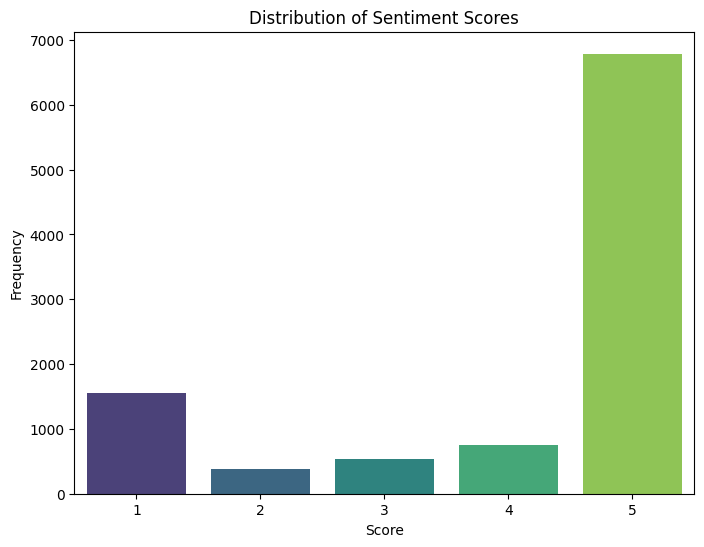

In [17]:
# Basic EDA: Distribution of scores
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='score', palette='viridis')
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

In [18]:

#Finding the percentage distribution of each score - we'll divide the number of records for each rating by total number of records

print(f"Score value count - percentage distribution: \n{round(df['score'].value_counts()/df.shape[0]*100,2)}")

Score value count - percentage distribution: 
score
5    67.89
1    15.47
4     7.51
3     5.30
2     3.83
Name: count, dtype: float64


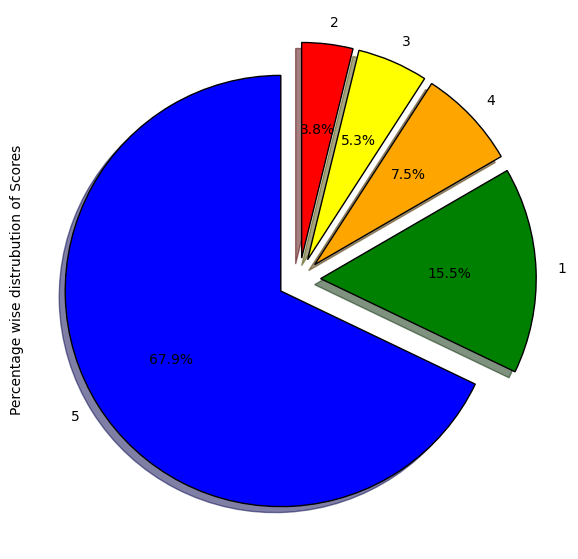

In [19]:
fig = plt.figure(figsize=(7,7))

colors = ('blue', 'green','orange','yellow','red')

wp = {'linewidth':1, "edgecolor":'black'}

tags = df['score'].value_counts()/df.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Scores')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [20]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Sentiments value count - percentage distribution: \n{round(df['sentiment'].value_counts()/df.shape[0]*100,2)}")

Sentiments value count - percentage distribution: 
sentiment
Positive    75.4
Negative    19.3
Neutral      5.3
Name: count, dtype: float64


/tmp/ipython-input-3545602514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


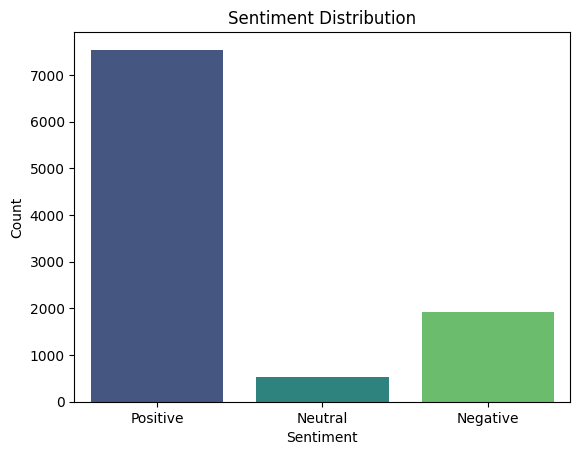

In [21]:
# Plot sentiment distribution
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

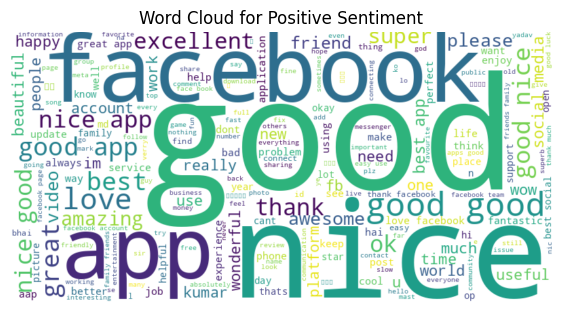

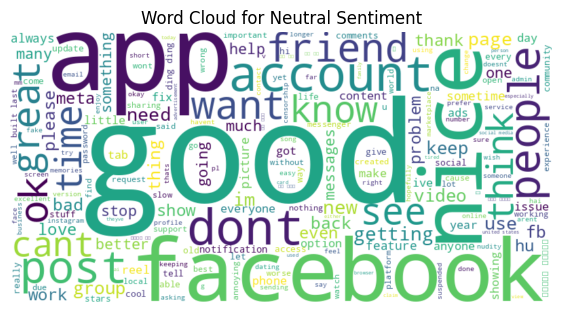

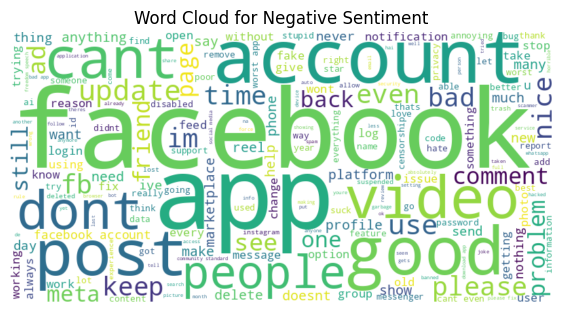

In [22]:
from wordcloud import WordCloud

# Generate word clouds
for sentiment in df['sentiment'].unique():
    text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(7, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

# **Feature Extraction**

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_content']).toarray()
y = df['sentiment']

# **Train/Test Split**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Train Multiple Machine Learning Models**

## **1. Logistic Regresssion**


In [25]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

# Logistic Regression
lr_preds = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_preds, zero_division=0))
cm_lr = confusion_matrix(y_test, lr_preds)
print("Confusion Matrix for Logistic Regression:")
print(cm_lr)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.38      0.52       400
     Neutral       0.00      0.00      0.00       104
    Positive       0.81      0.99      0.89      1496

    accuracy                           0.81      2000
   macro avg       0.54      0.46      0.47      2000
weighted avg       0.77      0.81      0.77      2000

Confusion Matrix for Logistic Regression:
[[ 152    0  248]
 [  13    0   91]
 [  21    0 1475]]


In [27]:
# Logistic Regression
lr_preds = lr_model.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_preds))

Logistic Regression
Accuracy: 0.8135


## **2. Naive Bayes**

In [28]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

# Naive Bayes
nb_preds = nb_model.predict(X_test)
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_preds))
# Naive Bayes predictions
nb_preds = nb_model.predict(X_test)

# Calculate the confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, nb_preds)

# Print the confusion matrix
print("Confusion Matrix for Naive Bayes:")
print(cm_nb)


Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.35      0.50       400
     Neutral       0.00      0.00      0.00       104
    Positive       0.81      0.99      0.89      1496

    accuracy                           0.81      2000
   macro avg       0.55      0.45      0.46      2000
weighted avg       0.77      0.81      0.77      2000

Confusion Matrix for Naive Bayes:
[[ 142    0  258]
 [  11    0   93]
 [  15    1 1480]]


In [30]:
# Naive Bayes
nb_preds = nb_model.predict(X_test)
print("\nNaive Bayes")
print("Accuracy:", accuracy_score(y_test, nb_preds))


Naive Bayes
Accuracy: 0.811


# **3.SVM**

In [31]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

# SVM
svm_preds = svm_model.predict(X_test)
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_preds, zero_division=0))

# Calculate the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, svm_preds)

# Print the confusion matrix
print("Confusion Matrix for SVM:")
print(cm_svm)


SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.37      0.51       400
     Neutral       0.00      0.00      0.00       104
    Positive       0.81      0.98      0.89      1496

    accuracy                           0.81      2000
   macro avg       0.53      0.45      0.46      2000
weighted avg       0.76      0.81      0.77      2000

Confusion Matrix for SVM:
[[ 149    0  251]
 [  13    0   91]
 [  27    0 1469]]


In [33]:
# SVM
svm_preds = svm_model.predict(X_test)
print("\nSVM")
print("Accuracy:", accuracy_score(y_test, svm_preds))


SVM
Accuracy: 0.809


# **4.Using BERT as feature extractor + train sklearn classifier**

In [34]:
!pip install -q transformers sentence-transformers

In [35]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [36]:
model_name = "sentence-transformers/all-MiniLM-L6-v2"  # small & fast sentence embedding model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 384, padding_idx=0)
    (position_embeddings): Embedding(512, 384)
    (token_type_embeddings): Embedding(2, 384)
    (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-5): 6 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=384, out_features=384, bias=True)
            (key): Linear(in_features=384, out_features=384, bias=True)
            (value): Linear(in_features=384, out_features=384, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=384, out_features=384, bias=True)
            (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)


In [37]:
def embed_texts(texts, batch_size=32):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        enc = tokenizer(batch, padding=True, truncation=True, return_tensors='pt')
        enc = {k:v.to(device) for k,v in enc.items()}
        with torch.no_grad():
            out = model(**enc, return_dict=True)
            # mean pooling
            token_embeddings = out.last_hidden_state  # (batch, seq_len, hidden)
            attention_mask = enc['attention_mask'].unsqueeze(-1)
            summed = (token_embeddings * attention_mask).sum(1)
            counts = attention_mask.sum(1)
            pooled = summed / counts
            embeddings.append(pooled.cpu().numpy())
    return np.vstack(embeddings)

In [38]:
# Prepare texts and labels
texts = df['cleaned_content'].tolist()
labels = df['sentiment'].values
X = embed_texts(texts)
# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.15, stratify=labels, random_state=42)

In [39]:
# Train classifier (example: Logistic Regression)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.68      0.50      0.57       290
     Neutral       0.00      0.00      0.00        79
    Positive       0.84      0.95      0.89      1131

    accuracy                           0.81      1500
   macro avg       0.51      0.48      0.49      1500
weighted avg       0.77      0.81      0.78      1500

Accuracy: 0.814


# **5.Fine-tune BERT (Hugging Face Trainer)**

In [40]:
!pip install -q evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.3 MB/s eta 0:00:00


In [41]:
# === Imports ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset, ClassLabel
import evaluate
import os

# Load the accuracy metric from the evaluate library
metric = evaluate.load("accuracy")

In [42]:
# === Load data ===
# assume df has columns: 'cleaned_content' and 'sentiment'
print(df.shape)
df = df.dropna(subset=['cleaned_content']).reset_index(drop=True)

(10000, 5)


In [43]:
# If labels are strings, map to ints
if df['sentiment'].dtype == object:
    label2id = {lab: i for i, lab in enumerate(sorted(df['sentiment'].unique()))}
    id2label = {v:k for k,v in label2id.items()}
    df['label'] = df['sentiment'].map(label2id)
else:
    id2label = None
    label2id = None

In [44]:
# Split
train_df, test_df = train_test_split(df, test_size=0.15, stratify=df['label'], random_state=42)
train_df, val_df  = train_test_split(train_df, test_size=0.1, stratify=train_df['label'], random_state=42)

In [45]:
# Convert to Hugging Face Dataset
train_ds = Dataset.from_pandas(train_df[['cleaned_content','label']])
val_ds   = Dataset.from_pandas(val_df[['cleaned_content','label']])
test_ds  = Dataset.from_pandas(test_df[['cleaned_content','label']])

In [46]:
# === Model & Tokenizer ===
model_name = "bert-base-uncased"   # or "distilbert-base-uncased" for faster/smaller
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [47]:
max_length = 128

In [48]:
def preprocess(batch):
    return tokenizer(batch['cleaned_content'], truncation=True, padding='max_length', max_length=max_length)

In [49]:
train_ds = train_ds.map(preprocess, batched=True)
val_ds   = val_ds.map(preprocess, batched=True)
test_ds  = test_ds.map(preprocess, batched=True)

Map:   0%|          | 0/7650 [00:00<?, ? examples/s]

Map:   0%|          | 0/850 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [50]:
# Set format for PyTorch
cols = ['input_ids','attention_mask','label']
train_ds.set_format(type='torch', columns=cols)
val_ds.set_format(type='torch', columns=cols)
test_ds.set_format(type='torch', columns=cols)

In [51]:
# === Create model ===
num_labels = len(df['label'].unique())
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [52]:
# === Metrics ===
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")

In [53]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy_metric.compute(predictions=preds, references=labels)['accuracy']
    if num_labels == 2:
        f1 = f1_metric.compute(predictions=preds, references=labels, average='binary')['f1']
    else:
        f1 = f1_metric.compute(predictions=preds, references=labels, average='weighted')['f1']
    return {"accuracy": acc, "f1": f1}

In [54]:
# === Training args ===
output_dir = "./bert_finetuned"
training_args = TrainingArguments(
    output_dir=output_dir,
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,   # reduce if GPU OOM; set to 8 or 4 as needed
    per_device_eval_batch_size=32,
    num_train_epochs=3,               # 2-4 good starting point
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    push_to_hub=False,
    fp16=torch.cuda.is_available(),   # only if GPU and supported
    logging_steps=100,
    report_to='none' # Disable reporting to services like wandb
)

In [55]:
# Disable wandb logging
import os
os.environ["WANDB_DISABLED"] = "true"

# === Trainer ===
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# === Train ===
trainer.train()

/tmp/ipython-input-3888817441.py:6: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.562900,0.525012,0.822353,0.790986
2,0.511500,0.519141,0.832941,0.799019
3,0.429000,0.544719,0.816471,0.788721


TrainOutput(global_step=1437, training_loss=0.5105344869232709, metrics={'train_runtime': 238.6451, 'train_samples_per_second': 96.168, 'train_steps_per_second': 6.021, 'total_flos': 1509613234214400.0, 'train_loss': 0.5105344869232709, 'epoch': 3.0})

In [56]:
# === Evaluate on test set ===
metrics = trainer.evaluate(eval_dataset=test_ds)
print("Test metrics:", metrics)

Test metrics: {'eval_loss': 0.525637149810791, 'eval_accuracy': 0.8333333333333334, 'eval_f1': 0.8006084237842069, 'eval_runtime': 3.285, 'eval_samples_per_second': 456.617, 'eval_steps_per_second': 14.307, 'epoch': 3.0}


In [57]:
# === Save model & tokenizer ===
trainer.save_model(output_dir)
tokenizer.save_pretrained(output_dir)
print("Saved to", output_dir)

Saved to ./bert_finetuned


# **RoBERTa model**

In [58]:
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# === Load Data ===
# assume df has columns: 'cleaned_content' and 'sentiment'
df = df.dropna(subset=['cleaned_content']).reset_index(drop=True)

# === Encode sentiment labels to numeric ===
if df['sentiment'].dtype == object:
    label2id = {lab: i for i, lab in enumerate(sorted(df['sentiment'].unique()))}
    id2label = {v: k for k, v in label2id.items()}
    df['label'] = df['sentiment'].map(label2id)
else:
    label2id = None
    id2label = None


In [59]:
# === Split into train, val, test ===
train_df, test_df = train_test_split(df, test_size=0.15, stratify=df['label'], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.1, stratify=train_df['label'], random_state=42)

# === Convert to Hugging Face Datasets ===
train_ds = Dataset.from_pandas(train_df[['cleaned_content', 'label']])
val_ds   = Dataset.from_pandas(val_df[['cleaned_content', 'label']])
test_ds  = Dataset.from_pandas(test_df[['cleaned_content', 'label']])

# === Load tokenizer and model ===
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(df['label'].unique()))

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [60]:
# === Tokenize ===
def tokenize(batch):
    return tokenizer(batch['cleaned_content'], padding=True, truncation=True, max_length=128)

train_ds = train_ds.map(tokenize, batched=True)
val_ds   = val_ds.map(tokenize, batched=True)
test_ds  = test_ds.map(tokenize, batched=True)

train_ds = train_ds.remove_columns(['cleaned_content'])
val_ds   = val_ds.remove_columns(['cleaned_content'])
test_ds  = test_ds.remove_columns(['cleaned_content'])
train_ds.set_format('torch')
val_ds.set_format('torch')
test_ds.set_format('torch')

Map:   0%|          | 0/7650 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Map:   0%|          | 0/850 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [61]:
# === Define metrics ===
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    acc = accuracy_score(p.label_ids, preds)
    f1 = f1_score(p.label_ids, preds, average='weighted')
    return {"accuracy": acc, "f1": f1}

In [62]:
# === Training arguments ===
training_args = TrainingArguments(
    output_dir="./results_roberta_fb",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=100
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [63]:
# === Trainer ===
# Disable wandb logging
import os
os.environ["WANDB_DISABLED"] = "true"

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

/tmp/ipython-input-3403492264.py:6: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [64]:
# === Train model ===
trainer.train()

# === Evaluate on test set ===
results = trainer.evaluate(test_ds)
print("Test metrics:", results)

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.552700,0.493416,0.850588,0.819942
2,0.500100,0.498146,0.847059,0.816744
3,0.437800,0.516883,0.842353,0.813858


Test metrics: {'eval_loss': 0.5144795179367065, 'eval_accuracy': 0.83, 'eval_f1': 0.7968129605851847, 'eval_runtime': 2.5346, 'eval_samples_per_second': 591.819, 'eval_steps_per_second': 37.087, 'epoch': 3.0}


In [65]:
# === Save model & tokenizer ===
output_dir = "./facebook_roberta_model"
trainer.save_model(output_dir)
tokenizer.save_pretrained(output_dir)
print("Saved to", output_dir)

Saved to ./facebook_roberta_model


# **Predict New Sentiments**

In [66]:
# Sample new texts
new_texts = ['I absolutely love this!', 'This is the worst experience ever.']

# Preprocess the new texts
new_texts_cleaned = [preprocess_text(text) for text in new_texts]

# Transform to TF-IDF
new_features = tfidf.transform(new_texts_cleaned).toarray()

# Predict using Logistic Regression
predictions = lr_model.predict(new_features)

# Print predictions
print(predictions)

['Positive' 'Negative']


# **Predict New Sentiments Using Fine-Tuned RoBERTa**

In [67]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# === Load the saved fine-tuned model ===
model_path = "./facebook_roberta_model"   # same as your saved folder
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# === Sample new Facebook texts ===
new_texts = [
    "I absolutely love this product! 💕",
    "This is the worst experience ever😐.",
    "It’s okay 😌, not too good, not too bad 😑.",
    "Amazing service and friendly staff 🤗!",
    "Absolutely terrible experience, very frustating",
    "Completely disappointed with the update 😒."
]

# === Tokenize the new texts ===
inputs = tokenizer(new_texts, padding=True, truncation=True, return_tensors="pt")

# === Make predictions ===
model.eval()
with torch.no_grad():
    outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    predicted_labels = torch.argmax(predictions, dim=1)

# === Map label IDs back to names ===
# These should match your label order used during training
id2label = {0: "Negative", 1: "Neutral", 2: "Positive"}   # adjust if needed

# === Print results ===
for text, label_id, probs in zip(new_texts, predicted_labels, predictions):
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {id2label[label_id.item()]}")
    print(f"Confidence Scores: {probs.tolist()}\n")


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Text: I absolutely love this product! 💕
Predicted Sentiment: Positive
Confidence Scores: [0.028231969103217125, 0.01440567895770073, 0.9573623538017273]

Text: This is the worst experience ever😐.
Predicted Sentiment: Negative
Confidence Scores: [0.8250635862350464, 0.06063506007194519, 0.11430143564939499]

Text: It’s okay 😌, not too good, not too bad 😑.
Predicted Sentiment: Positive
Confidence Scores: [0.07065854966640472, 0.034803181886672974, 0.8945382833480835]

Text: Amazing service and friendly staff 🤗!
Predicted Sentiment: Positive
Confidence Scores: [0.03046378307044506, 0.019598886370658875, 0.9499373435974121]

Text: Absolutely terrible experience, very frustating
Predicted Sentiment: Negative
Confidence Scores: [0.8996404409408569, 0.04872657731175423, 0.05163305252790451]

Text: Completely disappointed with the update 😒.
Predicted Sentiment: Negative
Confidence Scores: [0.8488065004348755, 0.06270024180412292, 0.0884932279586792]

